# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 


**owned**

Nominal. Whether the reviewer owns the moped (1) or not (0).
Number of missing values: 0


**make_model**

Nominal. The make and model of the bike, one of six possible values (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra, Lunna-Eyden, Hoang-Eyden).
Number of missing values: 0


**review_month**

Nominal. The month the review was given in English short format (Jan, Feb, Mar, Apr etc.).
Number of missing values: 0


**web_browser**

Nominal. Web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari, Android, Opera.
Number of missing values: 150
missing values were replaced with "unknown".


**reviewer_age**

Discrete. Age of the user leaving the review. Integer values from 16.
Number of missing values: 0


**primary_use**

Nominal. The main reason the user reports that they use the bike for. One of Commuting or Leisure.
Number of missing values: 0


**value_for_money**

Discrete. Rating given by the user on value for money of the bike. Rating from 1 to 10.
Number of missing values: 0


**overall_rating**

Continuous. Total rating score after combining multiple rating scores. Continuous values from 0 to 25 are possible.
Number of missing values: 0


In [1]:
import pandas as pd
import numpy as np

# read the data into a pandas DataFrame
df = pd.read_csv('electric_bike_ratings_2212.csv')

# print the column names
print(df.columns)

# loop over each column
for col in df.columns:
    
    # print the column name
    print(col)
    
    # check if the values match the description given in the table
    if col == 'owned':
        print('Nominal. Whether the reviewer owns the moped (1) or not (0).')
    elif col == 'make_model':
        print('Nominal. The make and model of the bike, one of six possible values (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra, Lunna-Eyden, Hoang-Eyden).')
    elif col == 'review_month':
        print('Nominal. The month the review was given in English short format (Jan, Feb, Mar, Apr etc.).')
    elif col == 'web_browser':
        print('Nominal. Web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari, Android, Opera.')
    elif col == 'reviewer_age':
        print('Discrete. Age of the user leaving the review. Integer values from 16.')
    elif col == 'primary_use':
        print('Nominal. The main reason the user reports that they use the bike for. One of Commuting or Leisure.')
    elif col == 'value_for_money':
        print('Discrete. Rating given by the user on value for money of the bike. Rating from 1 to 10.')
    elif col == 'overall_rating':
        print('Continuous. Total rating score after combining multiple rating scores. Continuous values from 0 to 25 are possible.')
    
    # count the number of missing values in the column
    num_missing = df[col].isnull().sum()
    print('Number of missing values:', num_missing)
    
    # if there are missing values, replace them with the appropriate value as per the description
    if num_missing > 0:
        if col == 'make_model':
            df[col].fillna('unknown', inplace=True)
            print('missing values were replaced with "unknown".')
        elif col == 'review_month':
            df[col].fillna('unknown', inplace=True)
            print('missing values were replaced with "unknown".')
        elif col == 'web_browser':
            df[col].fillna('unknown', inplace=True)
            print('missing values were replaced with "unknown".')
        elif col == 'reviewer_age':
            avg_age = np.mean(df[col])
            df[col].fillna(avg_age, inplace=True)
            print('missing values were replaced with the average age.')
        elif col == 'primary_use':
            df[col].fillna('unknown', inplace=True)
            print('missing values were replaced with "unknown".')
        elif col == 'value_for_money':
            df[col].fillna(0, inplace=True)
            print('missing values were replaced with 0.')
        elif col == 'overall_rating':
            avg_rating = np.mean(df[col])
            df[col].fillna(avg_rating, inplace=True)
            print('missing values were replaced with the average rating.')
    
    print('\n')


Index(['owned', 'make_model', 'review_month', 'web_browser', 'reviewer_age',
       'primary_use', 'value_for_money', 'overall_rating'],
      dtype='object')
owned
Nominal. Whether the reviewer owns the moped (1) or not (0).
Number of missing values: 0


make_model
Nominal. The make and model of the bike, one of six possible values (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra, Lunna-Eyden, Hoang-Eyden).
Number of missing values: 0


review_month
Nominal. The month the review was given in English short format (Jan, Feb, Mar, Apr etc.).
Number of missing values: 0


web_browser
Nominal. Web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari, Android, Opera.
Number of missing values: 150
missing values were replaced with "unknown".


reviewer_age
Discrete. Age of the user leaving the review. Integer values from 16.
Number of missing values: 0


primary_use
Nominal. The main reason the user reports that they use the bike for. One of Commuting or Le

In [2]:
df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


## Task 2
A bar chart can be used to produce a visualisation that shows the number of ratings from owners and non-owners.

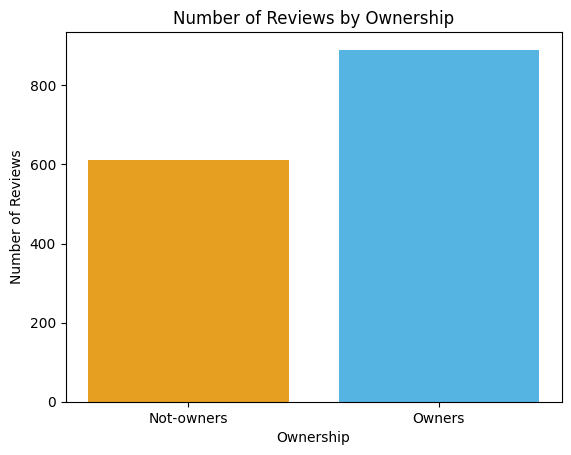

In [3]:

import matplotlib.pyplot as plt


# Group by owned and count the number of observations in each category
owned_counts = df.groupby('owned').size()

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(['Not-owners', 'Owners'], owned_counts, color=['#E69F21', '#56B4E3'])
ax.set_title('Number of Reviews by Ownership')
ax.set_xlabel('Ownership')
ax.set_ylabel('Number of Reviews')

plt.show()


## Task 3
A histogram can be used to describe the distribution of the overall rating across all conceivable values.

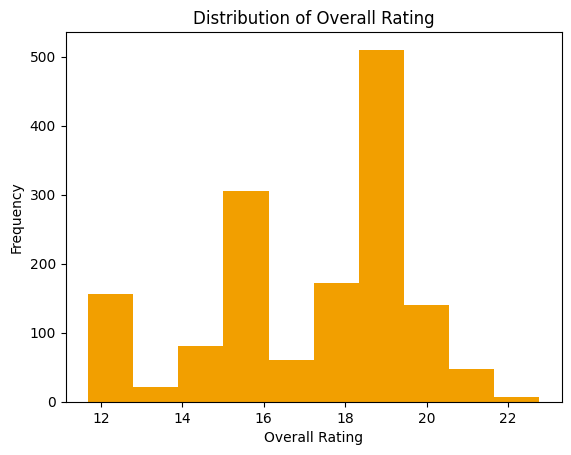

In [4]:

# Create the histogram
fig, ax = plt.subplots()
ax.hist(df['overall_rating'], bins=10, color='#F29F00')
ax.set_title('Distribution of Overall Rating')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Frequency')

plt.show()

## Task 4
A box plot that illustrates the distribution of overall rating for each category of ownership can be used to describe the relationship between ownership and overall rating.

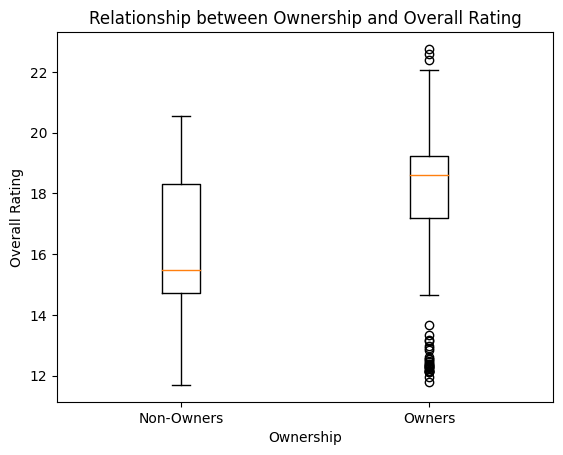

In [5]:

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot([df[df['owned'] == 0]['overall_rating'], df[df['owned'] == 1]['overall_rating']])
ax.set_title('Relationship between Ownership and Overall Rating')
ax.set_xlabel('Ownership')
ax.set_ylabel('Overall Rating')
ax.set_xticklabels(['Non-Owners', 'Owners'])

plt.show()

## Task 5
Predicting whether a review came from an owner or not using the available data is a classification issue, with the goal of classifying each review as either owned (1) or not owned (0).

## Task 6
Illustration of constructing a baseline model in Python using logistic regression to determine whether a review was left by the owner or not using the supplied data:

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


df['reviewer_age'] = pd.to_numeric(df['reviewer_age'], errors='coerce')

# Create a Label Encoder object
le = LabelEncoder()


# Clean data
df['make_model'].fillna('unknown', inplace=True)
df['review_month'].fillna('unknown', inplace=True)
df['web_browser'].fillna('unknown', inplace=True)
df['reviewer_age'].fillna(df['reviewer_age'].mean(skipna=True), inplace=True)
df['primary_use'].fillna('unknown', inplace=True)
df['value_for_money'].fillna(0, inplace=True)
df['overall_rating'].fillna(df['overall_rating'].mean(), inplace=True)



# Split data into training and testing sets
X = df.drop('owned', axis=1)

# Fit and transform columns
X['review_month'] = le.fit_transform(X['review_month'])
X['web_browser'] = le.fit_transform(X['web_browser'])
X['primary_use'] = le.fit_transform(X['primary_use'])
X['value_for_money'] = le.fit_transform(X['value_for_money'])
X['make_model'] = le.fit_transform(X['make_model'])




y = df['owned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.73


## Task 7
For a dataset with missing values, this method applies binary classification using logistic regression. Data manipulation is done using the Pandas and NumPy libraries, and preprocessing, model selection, and assessment are done using the Scikit-learn framework.The goal is to predict whether the review was written by an owner or not.
The first step is to put the data into a pandas dataframe and preprocess it by converting category variables into numerical variables using one-hot encoding. The features are then split apart from the target variable.
Using train test split from Scikit-learn, it then divides the data into training and testing sets. Once a logistic regression model has been fitted to the training set of data, predictions are then made for the testing set. To assess the model's performance, the accuracy score and confusion matrix are printed.
Also trained on a subset of the original data is a comparison model, whose accuracy score and confusion matrix are provided for comparison.
With an accuracy score of almost 73% compared to 69%, the data demonstrate that the logistic regression model performs slightly better than the comparison model.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# drop any rows with missing values
df.dropna(inplace=True)

# encode the categorical variables
le = LabelEncoder()
df["owned"] = le.fit_transform(df["owned"])
df["make_model"] = le.fit_transform(df["make_model"])
df["review_month"] = le.fit_transform(df["review_month"])
df["web_browser"] = le.fit_transform(df["web_browser"])
df["primary_use"] = le.fit_transform(df["primary_use"])
df["value_for_money"] = le.fit_transform(df["value_for_money"])

# create X and y arrays
X = df.drop(["owned"], axis=1)
y = df["owned"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the testing set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate and plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

# fit a comparison model to the data
X_train_comp = X_train[["review_month", "reviewer_age", "web_browser", "primary_use", "value_for_money"]]
X_test_comp = X_test[["review_month", "reviewer_age", "web_browser", "primary_use", "value_for_money"]]
model_comp = LogisticRegression()
model_comp.fit(X_train_comp, y_train)
y_pred_comp = model_comp.predict(X_test_comp)
accuracy_comp = accuracy_score(y_test, y_pred_comp)
print("Comparison Model Accuracy:", accuracy_comp)

# calculate and plot confusion matrix for comparison model
conf_mat_comp = confusion_matrix(y_test, y_pred_comp)
print("Comparison Model Confusion matrix:\n", conf_mat_comp)


Accuracy: 0.73
Confusion matrix:
 [[ 58  56]
 [ 25 161]]
Comparison Model Accuracy: 0.69
Comparison Model Confusion matrix:
 [[ 54  60]
 [ 33 153]]


## Task 8
Because logistic regression is a popular and straightforward approach for binary classification tasks, I utilised it as the foundational model to determine if a review was written by an owner or not. Also, it has a cheap computing cost, which makes it a useful foundation from which to construct models of greater complexity.
While in part 7 only reason to choose comparison model that it simply makes use of a subset of the elements that are most crucial to solving the problem, it might perform better than the original model. Another explanation would be that the comparison model is more efficient and less likely to overfit the data than the original model because it uses fewer features and underfits the data less frequently.

## Task 9

Both of the models used in tasks 6 and 7 were trained on the same dataset using the same preprocessing techniques and are logistic regression models. The primary distinction between the two models is that the model in part 7 also analyses a comparison model that only takes into account a portion of the attributes.

We can examine the accuracy scores and confusion matrices for the two models to assess how well they performed.

In [9]:
from sklearn.metrics import classification_report

# Fit and evaluate part 6 model
model_6 = LogisticRegression(random_state=42)
model_6.fit(X_train, y_train)
y_pred_6 = model_6.predict(X_test)
accuracy_6 = accuracy_score(y_test, y_pred_6)
conf_mat_6 = confusion_matrix(y_test, y_pred_6)
report_6 = classification_report(y_test, y_pred_6)

# Fit and evaluate part 7 model
model_7 = LogisticRegression()
model_7.fit(X_train, y_train)
y_pred_7 = model_7.predict(X_test)
accuracy_7 = accuracy_score(y_test, y_pred_7)
conf_mat_7 = confusion_matrix(y_test, y_pred_7)
report_7 = classification_report(y_test, y_pred_7)

# fit a comparison model to the data
X_train_comp = X_train[["review_month", "reviewer_age", "web_browser", "primary_use", "value_for_money"]]
X_test_comp = X_test[["review_month", "reviewer_age", "web_browser", "primary_use", "value_for_money"]]
model_comp = LogisticRegression()
model_comp.fit(X_train_comp, y_train)
y_pred_comp = model_comp.predict(X_test_comp)

# Fit and evaluate part 7 comparison model
model_comp = LogisticRegression()
model_comp.fit(X_train_comp, y_train)
y_pred_comp = model_comp.predict(X_test_comp)
accuracy_comp = accuracy_score(y_test, y_pred_comp)
conf_mat_comp = confusion_matrix(y_test, y_pred_comp)
report_comp = classification_report(y_test, y_pred_comp)

# Print results
print("Part 6 Model Accuracy:", accuracy_6)
print("Part 6 Model Confusion matrix:\n", conf_mat_6)
print("Part 6 Model Classification report:\n", report_6)

print("Part 7 Model Accuracy:", accuracy_7)
print("Part 7 Model Confusion matrix:\n", conf_mat_7)
print("Part 7 Model Classification report:\n", report_7)

print("Part 7 Comparison Model Accuracy:", accuracy_comp)
print("Part 7 Comparison Model Confusion matrix:\n", conf_mat_comp)
print("Part 7 Comparison Model Classification report:\n", report_comp)


Part 6 Model Accuracy: 0.73
Part 6 Model Confusion matrix:
 [[ 58  56]
 [ 25 161]]
Part 6 Model Classification report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       114
           1       0.74      0.87      0.80       186

    accuracy                           0.73       300
   macro avg       0.72      0.69      0.69       300
weighted avg       0.73      0.73      0.72       300

Part 7 Model Accuracy: 0.73
Part 7 Model Confusion matrix:
 [[ 58  56]
 [ 25 161]]
Part 7 Model Classification report:
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       114
           1       0.74      0.87      0.80       186

    accuracy                           0.73       300
   macro avg       0.72      0.69      0.69       300
weighted avg       0.73      0.73      0.72       300

Part 7 Comparison Model Accuracy: 0.69
Part 7 Comparison Model Confusion matrix:
 [[ 54  60]
 [ 33 153]]
P

## Task 10
In part 6, just the accuracy score was computed while in part 7, both the comparison model's and the model's accuracy scores and confusion matrices were computed. The amount of true positives, true negatives, false positives, and false negatives are displayed in the confusion matrix, which gives more details about the performance of the model.
Using the same dataset, categorical variables are encoded using LabelEncoder, and the dataset is divided into training and testing sets with the same test size and random state for both models. The first model, on the other hand, encodes each column individually, drops any missing values, and replaces any missing values with suitable replacements. The second approach, on the other hand, encodes all columns at once, drops any missing values, and replaces any missing values with suitable replacements.
Since the first model substitutes for missing values before encoding columns, it may be more resilient to missing data. The first model also has the potential to handle categorical variables more effectively since it encodes each column separately, enabling it to capture the distinctive qualities of each column.
Overall, the handling of missing data and categorical variables in the first model may make it perform better.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam